In [1]:
import pandas as pd
import os
import sys
import json
import numpy as np

In [2]:
sys.path.append("/home/aberhe/Projects/SANTAL/ASLR/src/")

In [3]:
import config as cf
import artcileDetail_xml as adx

In [5]:
os.listdir(cf.PATH_PROJECT)

['Results',
 'scripts',
 'src',
 '.ipynb_checkpoints',
 'notebooks',
 'RE',
 'data',
 'annotation_guideline_examples_annotated.jsonl',
 'annotation_guideline_examples_annotated2.jsonl',
 '.vscode',
 'compare_annotations.ipynb',
 'example_100_EB.jsonl',
 'db_aman_examples.jsonl',
 'jdzDB100.jsonl']

In [5]:
os.listdir(cf.PATH_RESULTS)

['Bacterias_Articles_Adjacency_Matrix.csv',
 'unique_included_article_files.txt',
 'extracted_2_Entities.csv',
 'extracted_2_Entities_with_Relation.csv',
 'extracted_2_Entities_04_09.csv',
 'Species_Disease_extracted_2_Entities_04_09.csv',
 'Species_Disease_extracted_2_Entities_04_09_For_RE.csv',
 'Sentences for species and diseases NER and RE annotation.json',
 'cleaned.json',
 'BioNER',
 '.ipynb_checkpoints',
 'Included_articles',
 'Bacterias_Species_Articles_Adjacency_Matrix_103.csv',
 'unique_included_article_files_Bacteria_Species.txt',
 'Bacterias_Articles_Adjacency_Matrix_72.csv',
 'Bacterias_Articles_Adjacency_Matrix_127.csv',
 'Bacterias_Articles_Adjacency_Matrix_127_withCounts.csv',
 'species_annotation.jsonl.json',
 'species_annotation.jsonl',
 'Cleaned_data_for_annotation.jsonl',
 'annotation_guideline_examples.jsonl',
 'Cleaned_data_for_annotation_1000.jsonl',
 'Cleaned_data_for_annotation_2000.jsonl',
 'Cleaned_data_for_annotation_3000.jsonl',
 'Cleaned_data_for_annotatio

In [6]:
cf.PATH_INCLUDED_ARTICLES

'/home/aberhe/Projects/SANTAL/ASLR/Results/Included_articles'

In [7]:
included_articles=[]
bacterias=[]
fi=0
for bacteria_files in os.listdir(os.path.join(cf.PATH_INCLUDED_ARTICLES,"Species")):
    if not "SPECIES" in bacteria_files and ".ipynb_checkpoints" not in bacteria_files:
        bacterias.append(bacteria_files)#.split("_")[0])
        with open(os.path.join(os.path.join(cf.PATH_INCLUDED_ARTICLES,"Species"),bacteria_files), "r") as f:
                files_list=f.readlines()
        included_articles.append(files_list)
    else:
        if len(bacteria_files.split('.')) ==3:
            print(f"DOUBLE CHECK {bacteria_filesv}")

In [8]:
len(included_articles)

192

In [9]:
len(os.listdir("/home/aberhe/Projects/SANTAL/ASLR/Results/Included_articles/Species"))

193

In [9]:
#included_articles[0][0]


In [10]:
a=included_articles[3][0].split(".txt")

In [17]:
bacterias[3]

'Corynebacterium.matruchotii.txt'

In [12]:
print(a)

['/data/projects/santal/data/PMC_Articles/oa_comm/txt/all/PMC4956651', '\n']


In [38]:
for aa in a:
    if "PMC" not in aa:
        print("hello ",aa)

hello  


In [13]:
bacterias[0:3]

['Butyricicoccus.pullicaecorum.txt',
 'Streptococcus.lutetiensis.txt',
 'Lactobacillus.reuteri.txt']

In [10]:
all_articles_list=[]
bacteria_list=[]
for_doubl_check=[]
for i,incdart in enumerate(included_articles):
    if len(incdart)>=1:
        print(i,bacterias[i])
        all_articles_list.append(incdart)
        bacteria_list.append(bacterias[i].replace(".txt","").replace(".","_"))
    else:
        if len(bacterias[i].split('.')) ==3:
            print(f"DOUBLE CHECK {bacterias[i]}")
            for_doubl_check.append(bacterias[i].replace(".txt","").replace(".","_"))

0 Butyricicoccus.pullicaecorum.txt
1 Streptococcus.lutetiensis.txt
2 Lactobacillus.reuteri.txt
3 Corynebacterium.matruchotii.txt
4 Campylobacter.concisus.txt
5 Actinomyces.naeslundii.txt
DOUBLE CHECK Saccharomonospora.unclassified.txt
8 Rothia.dentocariosa.txt
10 Morganella.morganii.txt
11 Eikenella.corrodens.txt
12 Lactobacillus.casei.paracasei.txt
13 Lactobacillus.crispatus.txt
14 Bacteroides.fluxus.txt
15 Actinomyces.sp.HPA0247.txt
16 Lachnospiraceae.bacterium.3.1.57FAA.CT1.txt
17 Lactococcus.lactis.txt
18 Lactobacillus.oris.txt
19 Haemophilus.parahaemolyticus.txt
21 Bifidobacterium.breve.txt
22 Actinomyces.turicensis.txt
23 Leuconostoc.lactis.txt
24 Ruminococcus.champanellensis.txt
26 Streptococcus.sobrinus.txt
27 Erysipelotrichaceae.bacterium.2.2.44A.txt
28 Bacillus.amyloliquefaciens.txt
30 Leptotrichia.wadei.txt
31 Centipeda.periodontii.txt
32 Enterobacteria.phage.HK97.txt
33 Haemophilus.pittmaniae.txt
34 Prevotella.multiformis.txt
35 Haemophilus.phage.HP1.txt
36 Catenibacterium.

In [20]:
species_to_seach_again=[sp for sp in for_doubl_check if not "unclassified" in sp.lower()]

In [16]:
species_to_seach_again

['Streptococcus_downei', 'Veillonella_ratti']

In [17]:
for_doubl_check

['Saccharomonospora_unclassified',
 'Capnocytophaga_unclassified',
 'Burkholderia_unclassified',
 'Parvimonas_unclassified',
 'Shewanella_unclassified',
 'Alloprevotella_unclassified',
 'Streptococcus_downei',
 'Pseudomonas_unclassified',
 'Cellulophaga_unclassified',
 'Rothia_unclassified',
 'Dysgonomonas_unclassified',
 'Veillonella_ratti',
 'Turicibacter_unclassified',
 'Slackia_unclassified',
 'Pusillimonas_unclassified',
 'Veillonella_unclassified',
 'Aeromonas_unclassified',
 'Mitsuokella_unclassified',
 'Actinopolyspora_unclassified',
 'Weissella_unclassified']

In [13]:
len(all_articles_list)

127

In [27]:
#all_articles_list

In [8]:
len(included_articles),len(bacterias)

(192, 192)

In [9]:
common_articles=[]
for i in range(len(all_articles_list)):
    tmp_common=[]
    for j in range(len(all_articles_list)):
        if i==j:
            tmp_common.append(len(set(all_articles_list[i])))
        else:
            intersection_list = list(set.intersection(set(all_articles_list[i]), set(all_articles_list[j])))
            tmp_common.append(len(intersection_list))
    common_articles.append(tmp_common)

In [23]:
df_cm = pd.DataFrame(np.array(common_articles), index = bacteria_list,
                  columns = bacteria_list)

In [24]:
df_comm_art = pd.DataFrame(common_articles, columns=bacteria_list)

In [25]:
df_comm_art["bacterias"]=bacteria_list

In [26]:
df_comm_art.set_index(keys="bacterias",drop=True)

,Butyricicoccus_pullicaecorum,Streptococcus_lutetiensis,Lactobacillus_reuteri,Corynebacterium_matruchotii,Campylobacter_concisus,Actinomyces_naeslundii,Rothia_dentocariosa,Morganella_morganii,Eikenella_corrodens,Lactobacillus_casei_paracasei,...,Bacillus_megaterium,Neisseria_flavescens,Campylobacter_showae,Clostridium_celatum,Veillonella_atypica,Enterococcus_casseliflavus,Providencia_alcalifaciens,Kosakonia_radicincitans,Aggregatibacter_segnis,Plesiomonas_shigelloides
bacterias,,,,,,,,,,,,,,,,,,,,,
Butyricicoccus_pullicaecorum,39,0,9,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,2
Streptococcus_lutetiensis,0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lactobacillus_reuteri,9,0,595,2,7,5,3,5,2,2,...,5,2,1,1,6,3,0,0,2,0
Corynebacterium_matruchotii,1,0,2,10,2,2,3,0,0,0,...,0,3,1,0,2,0,0,0,0,0
Campylobacter_concisus,0,0,7,2,48,3,2,3,0,0,...,0,2,1,1,6,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Enterococcus_casseliflavus,1,0,3,0,1,0,0,6,0,0,...,1,0,0,0,0,40,0,0,0,1
Providencia_alcalifaciens,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,5,0,0,0
Kosakonia_radicincitans,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
df_comm_art.to_csv(os.path.join(cf.PATH_RESULTS,"Bacterias_Articles_Adjacency_Matrix_127_withCounts.csv"))

## Reading CSV specieas adjcency matrix

In [10]:
#df_comm_art.to_csv(os.path.join(cf.PATH_RESULTS,"Bacterias_Articles_Adjacency_Matrix.csv"))
df_comm_art=pd.read_csv(os.path.join(cf.PATH_RESULTS,"Bacterias_Articles_Adjacency_Matrix_127_withCounts.csv"))
df_comm_art=df_comm_art.drop(columns=["Unnamed: 0"])
df_comm_art=df_comm_art.set_index(keys="bacterias",drop=True)

In [11]:
df_comm_art

,Butyricicoccus_pullicaecorum,Streptococcus_lutetiensis,Lactobacillus_reuteri,Corynebacterium_matruchotii,Campylobacter_concisus,Actinomyces_naeslundii,Rothia_dentocariosa,Morganella_morganii,Eikenella_corrodens,Lactobacillus_casei_paracasei,...,Bacillus_megaterium,Neisseria_flavescens,Campylobacter_showae,Clostridium_celatum,Veillonella_atypica,Enterococcus_casseliflavus,Providencia_alcalifaciens,Kosakonia_radicincitans,Aggregatibacter_segnis,Plesiomonas_shigelloides
bacterias,,,,,,,,,,,,,,,,,,,,,
Butyricicoccus_pullicaecorum,39,0,9,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,2
Streptococcus_lutetiensis,0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lactobacillus_reuteri,9,0,595,2,7,5,3,5,2,2,...,5,2,1,1,6,3,0,0,2,0
Corynebacterium_matruchotii,1,0,2,10,2,2,3,0,0,0,...,0,3,1,0,2,0,0,0,0,0
Campylobacter_concisus,0,0,7,2,48,3,2,3,0,0,...,0,2,1,1,6,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Enterococcus_casseliflavus,1,0,3,0,1,0,0,6,0,0,...,1,0,0,0,0,40,0,0,0,1
Providencia_alcalifaciens,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,5,0,0,0
Kosakonia_radicincitans,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
print("There are {} bacteria species selected".format(len(bacterias)))

There are 192 bacteria species selected


In [13]:
len(included_articles)

192

In [14]:
bacterias_articles=[len(bac_art) for bac_art in included_articles]
len(bacterias_articles),sum(bacterias_articles)

(192, 14270)

In [15]:
df_bacteria_articles=pd.DataFrame(columns=["Bacteria","Articles"])

df_bacteria_articles.Bacteria=bacterias
df_bacteria_articles.Articles=bacterias_articles

In [16]:
df_bacteria_articles.Articles.max()

3536

In [17]:
len(os.listdir(os.path.join(cf.PATH_INCLUDED_ARTICLES,"Species")))

193

In [18]:
included_articles_sp=[]
bacterias_species=[]
for bacteria_files in os.listdir(os.path.join(cf.PATH_INCLUDED_ARTICLES,"Species")):
    if bacteria_files.endswith(".txt"):
        with open(os.path.join(os.path.join(cf.PATH_INCLUDED_ARTICLES,"Species"),bacteria_files), "r") as f:
                files_list=f.readlines()
        if len(files_list)>=1:
            included_articles_sp.append(files_list)
            bacterias_species.append(bacteria_files.split(".txt")[0])

In [19]:
common_articles_sp=[]
for i in range(len(included_articles_sp)):
    tmp_common=[]
    for j in range(len(included_articles_sp)):
        if i==j:
            tmp_common.append(0)
        else:
            intersection_list = list(set.intersection(set(included_articles_sp[i]), set(included_articles_sp[j])))
            tmp_common.append(len(intersection_list))
    common_articles_sp.append(tmp_common)

In [21]:
df_cm_sp = pd.DataFrame(np.array(common_articles_sp), index = bacterias_species,
                  columns = bacterias_species)

In [20]:
len(bacterias_species[0])

28

In [22]:
bacterias_species_articles=[len(bac_art) for bac_art in included_articles_sp]

In [23]:
print("There are {} bacteria species and {} articles included!!".format(len(bacterias_species),sum(bacterias_species_articles)))

There are 135 bacteria species and 14270 articles included!!


In [24]:
for b, a in zip(bacterias_species,bacterias_species_articles):
    print(b,a)

Butyricicoccus.pullicaecorum 39
Streptococcus.lutetiensis 7
Lactobacillus.reuteri 595
Corynebacterium.matruchotii 10
Campylobacter.concisus 48
Actinomyces.naeslundii 27
Rothia.dentocariosa 23
Morganella.morganii 193
Eikenella.corrodens 76
Lactobacillus.casei.paracasei 9
Lactobacillus.crispatus 65
Bacteroides.fluxus 3
Actinomyces.sp.HPA0247 1
Lachnospiraceae.bacterium.3.1.57FAA.CT1 8
Lactococcus.lactis 333
Lactobacillus.oris 4
Haemophilus.parahaemolyticus 1
Bifidobacterium.breve 353
Actinomyces.turicensis 6
Leuconostoc.lactis 13
Ruminococcus.champanellensis 10
Streptococcus.sobrinus 22
Erysipelotrichaceae.bacterium.2.2.44A 3
Bacillus.amyloliquefaciens 64
Leptotrichia.wadei 7
Centipeda.periodontii 3
Enterobacteria.phage.HK97 2
Haemophilus.pittmaniae 4
Prevotella.multiformis 1
Haemophilus.phage.HP1 1
Catenibacterium.mitsuokai 10
Alloprevotella.tannerae 10
Streptococcus.vestibularis 13
Solobacterium.moorei 41
Enterobacteriaceae.bacterium.9.2.54FAA 1
Bifidobacterium.dentium 60
Lactobacillus

In [25]:
df_bacteria_species_articles=pd.DataFrame(columns=["Bacteria_species","Articles"])

df_bacteria_species_articles.Bacteria_species=bacterias_species
df_bacteria_species_articles.Articles=bacterias_species_articles

In [26]:
df_bacteria_species_articles

,Bacteria_species,Articles
0,Butyricicoccus.pullicaecorum,39
1,Streptococcus.lutetiensis,7
2,Lactobacillus.reuteri,595
3,Corynebacterium.matruchotii,10
4,Campylobacter.concisus,48
...,...,...
130,Enterococcus.casseliflavus,40
131,Providencia.alcalifaciens,5
132,Kosakonia.radicincitans,1
133,Aggregatibacter.segnis,12


In [28]:
sum(df_bacteria_species_articles.Articles.tolist())

14270

In [43]:
df_bacteria_species_articles=df_bacteria_species_articles.sort_values(by="Articles",ascending=False)

In [44]:
df_bacteria_species_articles

,Bacteria_species,Articles
122,Helicobacter.pylori,3536
117,Saccharomyces.cerevisiae,1537
36,Lactobacillus.rhamnosus,1130
110,Lactobacillus.plantarum,921
2,Lactobacillus.reuteri,595
...,...,...
101,Actinobacillus.unclassified,1
95,Bacillus.cereus.thuringiensis,1
59,Lachnospiraceae.bacterium.9.1.43BFAA,1
12,Actinomyces.sp.HPA0247,1


In [29]:
unique_articles=[article for articles in included_articles for article in articles]
unique_articles=list(set(unique_articles))

In [30]:
sum(bacterias_species_articles)-len(unique_articles)

5599

In [63]:
552423-13626

538797

In [62]:
len(unique_articles),sum(bacterias_species_articles)

(8416, 13626)

In [47]:
with open(os.path.join(cf.PATH_RESULTS,"unique_included_article_files_Species.txt"),"w") as f:
    for art in unique_articles:
        f.write(art)

In [48]:
unique_articles_sp=[article for articles in included_articles_sp for article in articles]
unique_articles_sp=list(set(unique_articles_sp))
s=sum([len(articles) for articles in included_articles_sp])
s,len(unique_articles_sp),s-len(unique_articles_sp)

(14270, 8671, 5599)

In [ ]:
unique_articles_sp[0]

In [ ]:
articlePath="/data/projects/santal/data/PMC_Articles/oa_comm/xml/all/"+article.split("/")[-1].replace(".txt",".xml")

In [11]:
import seaborn as sn
import matplotlib.pyplot as plt

In [50]:
df_comm_art_20=df_comm_art[:20]

In [51]:
df_comm_art_20=df_comm_art_20.iloc[:, : 20]

In [52]:
df_comm_art.head(10)

,Butyricicoccus_pullicaecorum,Streptococcus_lutetiensis,Lactobacillus_reuteri,Corynebacterium_matruchotii,Campylobacter_concisus,Actinomyces_naeslundii,Rothia_dentocariosa,Morganella_morganii,Eikenella_corrodens,Lactobacillus_casei_paracasei,...,Bacillus_megaterium,Neisseria_flavescens,Campylobacter_showae,Clostridium_celatum,Veillonella_atypica,Enterococcus_casseliflavus,Providencia_alcalifaciens,Kosakonia_radicincitans,Aggregatibacter_segnis,Plesiomonas_shigelloides
bacterias,,,,,,,,,,,,,,,,,,,,,
Butyricicoccus_pullicaecorum,39,0,9,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,2
Streptococcus_lutetiensis,0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lactobacillus_reuteri,9,0,595,2,7,5,3,5,2,2,...,5,2,1,1,6,3,0,0,2,0
Corynebacterium_matruchotii,1,0,2,10,2,2,3,0,0,0,...,0,3,1,0,2,0,0,0,0,0
Campylobacter_concisus,0,0,7,2,48,3,2,3,0,0,...,0,2,1,1,6,1,0,0,1,0
Actinomyces_naeslundii,0,0,5,2,3,27,2,0,5,0,...,0,2,1,0,2,0,0,0,0,0
Rothia_dentocariosa,1,0,3,3,2,2,23,1,1,0,...,0,2,1,0,2,0,0,0,1,0
Morganella_morganii,0,0,5,0,3,0,1,193,7,0,...,1,0,0,0,0,6,2,0,0,2
Eikenella_corrodens,0,0,2,0,0,5,1,7,76,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: ylabel='bacterias'>

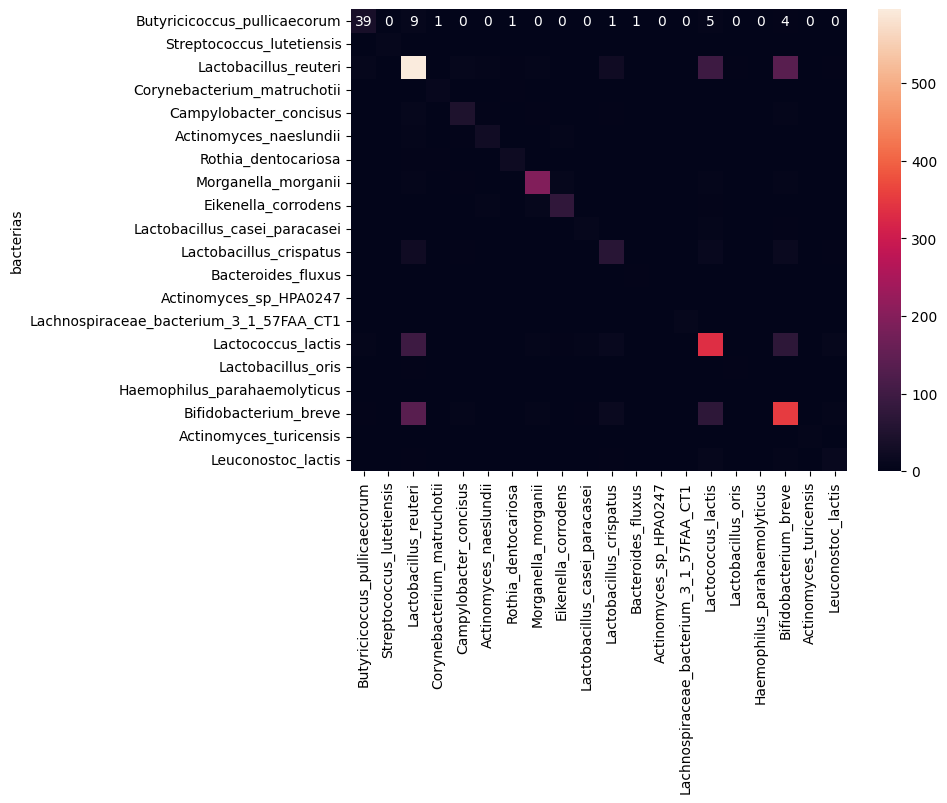

In [53]:
plt.figure(figsize = (8,6))
sn.heatmap(df_comm_art_20,annot=True)

<Axes: >

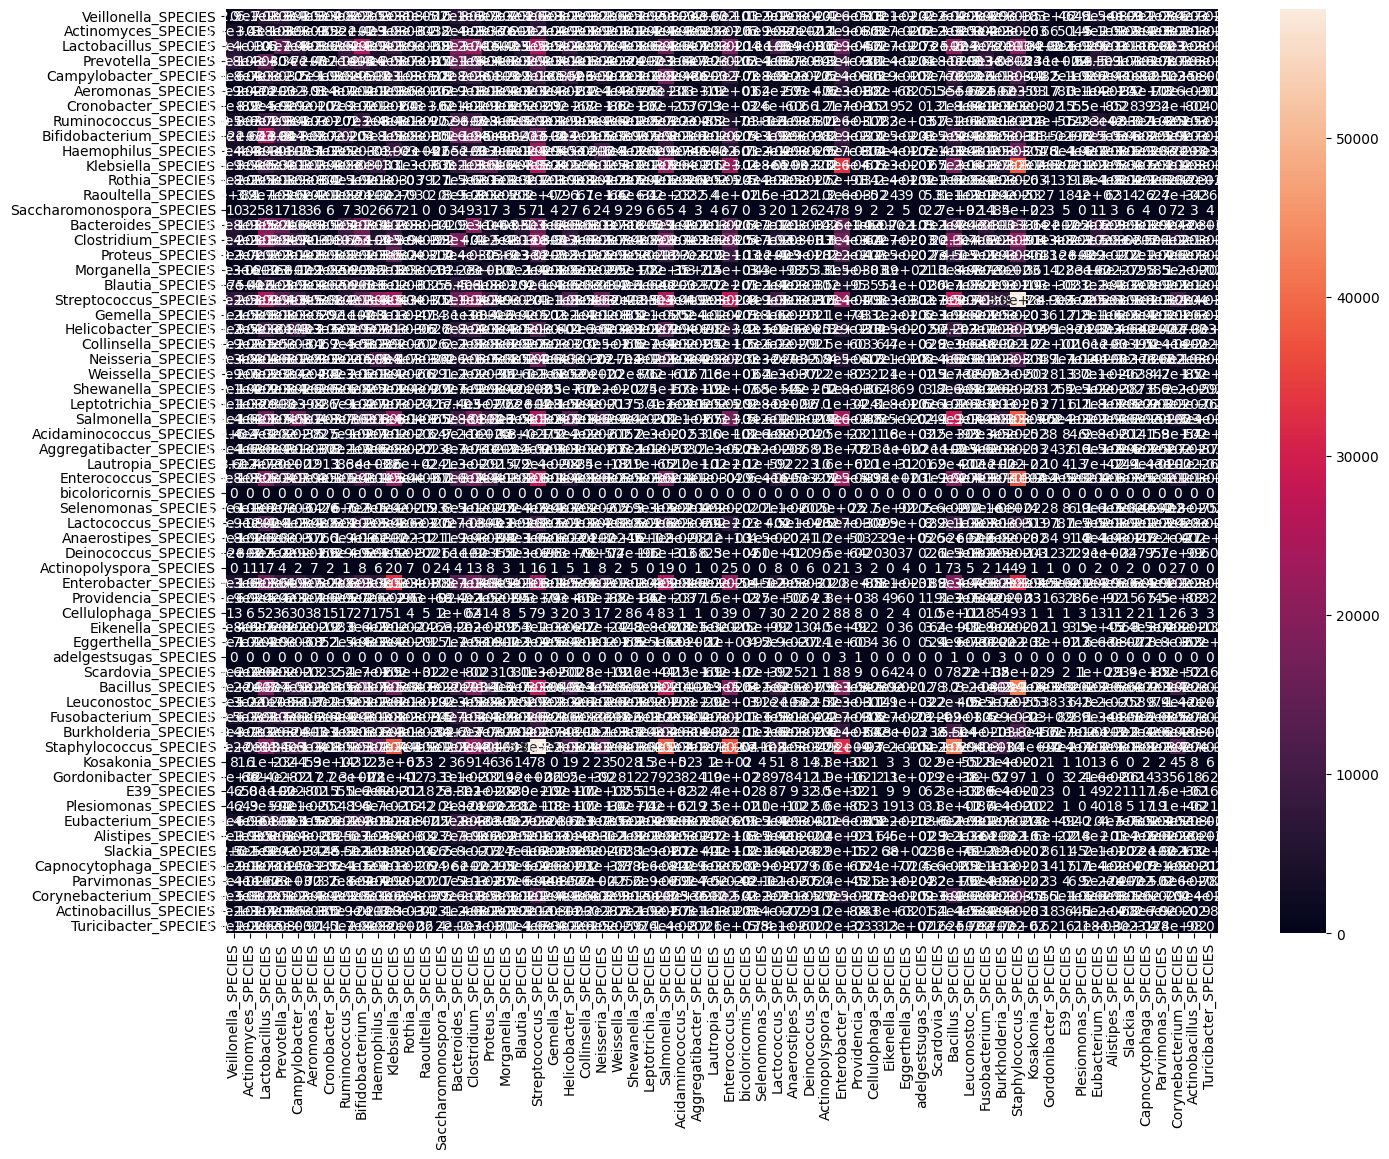

In [93]:
plt.figure(figsize = (16,12))
sn.heatmap(df_cm_sp,annot=True)

## Checking Extracted Entities

In [7]:
os.listdir(cf.PATH_BIONER_EXTRACTED)

['Veillonella', 'Actinomyces']

In [34]:
df_list=[]
ner_dfs=os.path.join(cf.PATH_BIONER_EXTRACTED,"Actinomyces")
for df_file in os.listdir(ner_dfs):
    if df_file.endswith(".csv"):
        df=pd.read_csv(os.path.join(ner_dfs,df_file))
        df=df.drop(columns="Unnamed: 0")
        df["PMC_ID"]=[df_file.split(".")[0]]*len(df)
        df_list.append(df)

In [35]:
df

,sent_id,sentence,entity,start_chunck,end_chunk,label,score,PMC_ID
0,PMC6034314_0,Tuberculosis ( TB ) predominately presents wit...,Tuberculosis,0,12,Disease,0.989,PMC6034314
1,PMC6034314_0,Tuberculosis ( TB ) predominately presents wit...,TB,14,16,Disease,0.996,PMC6034314
2,PMC6034314_0,Tuberculosis ( TB ) predominately presents wit...,pulmonary disease,46,63,Disease,0.829,PMC6034314
3,PMC6034314_0,Tuberculosis ( TB ) predominately presents wit...,TB,90,92,Disease,0.767,PMC6034314
4,PMC6034314_0,Tuberculosis ( TB ) predominately presents wit...,EPTB,94,98,Disease,0.991,PMC6034314
...,...,...,...,...,...,...,...,...
203,PMC6034314_180,Similar to pulmonary and other extra-pulmonary...,M. tuberculosis,94,109,Species,0.797,PMC6034314
204,PMC6034314_180,Similar to pulmonary and other extra-pulmonary...,tuberculosis,97,109,Disease,0.856,PMC6034314
205,PMC6034314_181,Most patients positive for endometrial TB were...,endometrial TB,27,41,Disease,0.732,PMC6034314
206,PMC6034314_182,"In the diagnosis of endometrial TB , IS1081-PC...",endometrial TB,20,34,Disease,0.775,PMC6034314


In [17]:
df.shape

(245, 8)

In [36]:
df_all=pd.concat(df_list)

In [37]:
df_all.shape

(596218, 8)

In [38]:
d_sp=df_all[df_all["label"]=="Species"]
d_sp.shape

(155753, 8)

In [39]:
d_sp

,sent_id,sentence,entity,start_chunck,end_chunk,label,score,PMC_ID
7,PMC5123387_1,Methods Human T cells were transduced with MSL...,Human,9,14,Species,0.887,PMC5123387
11,PMC5123387_1,Methods Human T cells were transduced with MSL...,mouse,158,163,Species,0.864,PMC5123387
22,PMC5123387_3,"Results A single , low-dose ofM28z CAR T cells...",mice,119,123,Species,0.881,PMC5123387
46,PMC5123387_18,Methods We utilized a combination of knockout ...,mice,55,59,Species,0.957,PMC5123387
48,PMC5123387_18,Methods We utilized a combination of knockout ...,mice,194,198,Species,0.982,PMC5123387
...,...,...,...,...,...,...,...,...
172,PMC6034314_148,"Similarly , in the present study , all isolate...",M. tuberculosis,75,90,Species,0.751,PMC6034314
174,PMC6034314_150,"They are acid fast by Ziehl Neelson staining ,...",Rhodococcus equi,52,68,Species,0.903,PMC6034314
178,PMC6034314_151,Active GTB diagnosis was suggested by characte...,patients,158,166,Species,0.798,PMC6034314
190,PMC6034314_169,It is routinely used for the diagnosis of GTB ...,M. tuberculosis,84,99,Species,0.792,PMC6034314


In [40]:
#from df_all get all the rows that have the same sent_id with d_sp
d_sp_sent_ids=d_sp.sent_id.tolist()
d_sp_others=df_all[df_all["sent_id"].isin(d_sp_sent_ids)]

In [41]:
d_sp_others.shape

(278361, 8)

In [42]:
d_sp_ch_dis=d_sp_others[d_sp_others["label"].isin(["Species","Disease","Chemical"])]

In [43]:
d_sp_ch_dis.shape

(238360, 8)

In [44]:
d_sp_ch_dis

,sent_id,sentence,entity,start_chunck,end_chunk,label,score,PMC_ID
7,PMC5123387_1,Methods Human T cells were transduced with MSL...,Human,9,14,Species,0.887,PMC5123387
11,PMC5123387_1,Methods Human T cells were transduced with MSL...,mouse,158,163,Species,0.864,PMC5123387
12,PMC5123387_1,Methods Human T cells were transduced with MSL...,tumor,207,212,Disease,0.994,PMC5123387
21,PMC5123387_3,"Results A single , low-dose ofM28z CAR T cells...",tumor,96,101,Disease,0.969,PMC5123387
22,PMC5123387_3,"Results A single , low-dose ofM28z CAR T cells...",mice,119,123,Species,0.881,PMC5123387
...,...,...,...,...,...,...,...,...
191,PMC6034314_169,It is routinely used for the diagnosis of GTB ...,tuberculosis,87,99,Disease,0.915,PMC6034314
201,PMC6034314_180,Similar to pulmonary and other extra-pulmonary...,TB,47,49,Disease,0.866,PMC6034314
202,PMC6034314_180,Similar to pulmonary and other extra-pulmonary...,GTB,74,77,Disease,0.991,PMC6034314
203,PMC6034314_180,Similar to pulmonary and other extra-pulmonary...,M. tuberculosis,94,109,Species,0.797,PMC6034314


In [57]:
d_sp_ch_dis[d_sp_ch_dis["sent_id"]=="PMC6034314_180"].shape[0]

4

In [65]:
sent_id_unique=d_sp_ch_dis.sent_id.value_counts().to_dict()
#sent_id_unique_count=[d_sp_ch_dis[d_sp_ch_dis["sent_id"]==sent_id].shape[0] for sent_id in sent_id_unique]

In [68]:
sent_id_unique

{'PMC5552814_218': 221,
 'PMC5552814_97': 221,
 'PMC5552814_148': 122,
 'PMC5552814_269': 122,
 'PMC5503856_29': 113,
 'PMC5503856_49': 109,
 'PMC5477746_44': 100,
 'PMC5477746_74': 100,
 'PMC5477746_75': 88,
 'PMC5477746_45': 88,
 'PMC4652425_30': 75,
 'PMC4804642_43': 71,
 'PMC4804642_87': 71,
 'PMC5361780_39': 68,
 'PMC5469791_203': 68,
 'PMC5469791_61': 68,
 'PMC4618344_44': 66,
 'PMC4640220_3': 64,
 'PMC4865241_176': 57,
 'PMC4865241_126': 57,
 'PMC5525269_90': 56,
 'PMC5517611_629': 55,
 'PMC5517611_568': 55,
 'PMC5366107_34': 50,
 'PMC3495101_205': 49,
 'PMC3495101_287': 49,
 'PMC4618344_557': 48,
 'PMC5477746_47': 47,
 'PMC5109646_81': 47,
 'PMC5477746_77': 47,
 'PMC3339601_500': 46,
 'PMC3339601_313': 46,
 'PMC5477746_76': 42,
 'PMC5477746_46': 42,
 'PMC4884373_146': 40,
 'PMC4864928_89': 40,
 'PMC4864928_163': 40,
 'PMC4884373_106': 40,
 'PMC5513040_580': 39,
 'PMC5513040_325': 39,
 'PMC4450167_337': 38,
 'PMC4788914_26': 38,
 'PMC4450167_41': 38,
 'PMC4788914_92': 38,
 'PMC5

In [66]:
len(sent_id_unique)

92972

In [89]:
from tqdm import tqdm

In [ ]:
#iterate through dictionary
# for each key get the rows from d_sp_ch_dis
for key, value in tqdm(sent_id_unique.items()):
    print(key,value)
    if value>1:
        print(d_sp_ch_dis[d_sp_ch_dis["sent_id"]==key].shape[0])

In [129]:
a=d_sp_ch_dis[d_sp_ch_dis["sent_id"]=="PMC5270751_273"]
a=a.reset_index(drop=True)

In [130]:
print(a.sentence[0])
print(a.label.tolist())

In this case , the pathway used for alka ( e ) ne production was a combination of the fatty acyl‐CoA reductase from Clostridium acetobutylicum ( acr ) and a fatty ADC from Arabidopsis thaliana ( CER1 ) which produces short‐chain alkanes .
['Chemical', 'Chemical', 'Species', 'Species', 'Chemical']


In [162]:
#Choose sent_ids that have a count of below 10
data_list=[]
info={"meta":{"PMC_ID":"","Sentence_id":"","index":"","line":""},"text":""}
ind=0
for key, count in tqdm(sent_id_unique.items()):
    #print(key, count)
    dict_span={}#{"start":0,"end":,"label":"Species"}
    if count<=4 and count>=2:
        d=d_sp_ch_dis[d_sp_ch_dis["sent_id"]==key]
        d=d.reset_index(drop=True)
        #print(d.shape[0],key,count)
        if len(set(d.label.tolist()))>1:
            info["text"]=d_sp_ch_dis[d_sp_ch_dis["sent_id"]==key].sentence.tolist()[0]
            meta_dict={"PMC_ID":d_sp_ch_dis[d_sp_ch_dis["sent_id"]==key].PMC_ID.tolist()[0],"Sentence_id":key}
            info["meta"]=meta_dict
            info['meta']["index"]=ind
            ind=ind+1
            info["meta"]["line"]=ind
            for i in range(d.shape[0]):
                #print(i)
                dict_span["start"]=d.start_chunck[i]
                dict_span["end"]=d.end_chunk[i]
                dict_span["text"]=d.entity[i]
                dict_span["label"]=d.label[i]
                info["meta"][d.entity[i]]=d.label[i][0]
                #info["spans"].append(dict_span)
                dict_span={}
            data_list.append(info)
            info={"meta":{"PMC_ID":"","Sentence_id":""},"text":""}
        

  0%|          | 0/92972 [00:00<?, ?it/s]

100%|██████████| 92972/92972 [30:00<00:00, 51.63it/s]   


In [164]:
len(data_list)

32466

In [166]:
data_list[1]

{'meta': {'PMC_ID': 'PMC4130309',
  'Sentence_id': 'PMC4130309_144',
  'index': 1,
  'line': 2,
  'Streptococcus mutans': 'S',
  'Candida albicans': 'S',
  'Candida galbrata': 'S',
  'Photodithazine': 'C'},
 'text': 'formed multispecies biofilms from Streptococcus mutans , Candida albicans and Candida galbrata for 48 h ; afterwards they were incubated with Photodithazine ® at concentrations from 100 to 250 mg / l for 20 min and exposed to red light from a LED light source ( 71 mW / cm2 ; 660 nm ) for 9 min ( light dose 37.5 J / cm2 ) .',
 'index': '',
 'line': ''}

In [169]:
jsonData[1]

{'meta': {'PMC_ID': 'PMC4130309',
  'Sentence_id': 'PMC4130309_144',
  'index': 1,
  'line': 2,
  'Streptococcus mutans': 'S',
  'Candida albicans': 'S',
  'Candida galbrata': 'S',
  'Photodithazine': 'C'},
 'text': 'formed multispecies biofilms from Streptococcus mutans , Candida albicans and Candida galbrata for 48 h ; afterwards they were incubated with Photodithazine ® at concentrations from 100 to 250 mg / l for 20 min and exposed to red light from a LED light source ( 71 mW / cm2 ; 660 nm ) for 9 min ( light dose 37.5 J / cm2 ) .'}

In [168]:
#keep only the remove a ky index and line ''
jsonData=[{"meta":data["meta"],"text":data["text"]} for data in data_list]

In [172]:
with open(os.path.join(cf.PATH_RESULTS,'Entities_Annotation_All_Greater_than_2_less_Than_4_1000_Example.jsonl'), "w") as file:
    for data in jsonData:
        json.dump(data, file)
        file.write("\n")

In [171]:
#randomly selcte 1000 examples from jsonData
import random
random.seed(42)
random.shuffle(jsonData)
datajson_1000=jsonData[:1000]

In [148]:
data_list[0]

{'meta': {'PMC_ID': 'PMC3716926', 'Sentence_id': 'PMC3716926_404'},
 'text': 'When necessary , antibiotics were used at the following concentrations : ampicillin ( 100 μg · ml − 1 ) , kanamycin ( 100 μg · ml − 1 ) , apramycin ( 100 μg · ml − 1 ) or hygromycin B ( 50 μg · ml − 1 ) in LB for E. coli ; Nalidixic acid ( 25 μg · ml − 1 ) , apramycin ( 100 μg · ml − 1 ) or kanamycin ( 100 μg · ml − 1 ) in MS for Streptomyces [ 6 ] .',
 'spans': [{'start': 16,
   'end': 27,
   'text': 'antibiotics',
   'label': 'Chemical'},
  {'start': 71, 'end': 81, 'text': 'ampicillin', 'label': 'Chemical'},
  {'start': 99, 'end': 108, 'text': 'kanamycin', 'label': 'Chemical'},
  {'start': 126, 'end': 135, 'text': 'apramycin', 'label': 'Chemical'},
  {'start': 155, 'end': 167, 'text': 'hygromycin B', 'label': 'Chemical'},
  {'start': 193, 'end': 200, 'text': 'E. coli', 'label': 'Species'},
  {'start': 202, 'end': 216, 'text': 'Nalidixic acid', 'label': 'Chemical'},
  {'start': 233, 'end': 242, 'text': 'apra

In [149]:
data_list[0]['text']

'When necessary , antibiotics were used at the following concentrations : ampicillin ( 100 μg · ml − 1 ) , kanamycin ( 100 μg · ml − 1 ) , apramycin ( 100 μg · ml − 1 ) or hygromycin B ( 50 μg · ml − 1 ) in LB for E. coli ; Nalidixic acid ( 25 μg · ml − 1 ) , apramycin ( 100 μg · ml − 1 ) or kanamycin ( 100 μg · ml − 1 ) in MS for Streptomyces [ 6 ] .'

In [153]:
data_list[0]['spans']

[{'start': 16, 'end': 27, 'text': 'antibiotics', 'label': 'Chemical'},
 {'start': 71, 'end': 81, 'text': 'ampicillin', 'label': 'Chemical'},
 {'start': 99, 'end': 108, 'text': 'kanamycin', 'label': 'Chemical'},
 {'start': 126, 'end': 135, 'text': 'apramycin', 'label': 'Chemical'},
 {'start': 155, 'end': 167, 'text': 'hygromycin B', 'label': 'Chemical'},
 {'start': 193, 'end': 200, 'text': 'E. coli', 'label': 'Species'},
 {'start': 202, 'end': 216, 'text': 'Nalidixic acid', 'label': 'Chemical'},
 {'start': 233, 'end': 242, 'text': 'apramycin', 'label': 'Chemical'},
 {'start': 262, 'end': 271, 'text': 'kanamycin', 'label': 'Chemical'},
 {'start': 298, 'end': 310, 'text': 'Streptomyces', 'label': 'Species'}]

In [83]:
len(data_list)

9661

In [52]:
len([s for s in sentence_counts if s>5 and s<10])

5027

In [ ]:
d_sp_ch_dis.to_csv(os.path.join(cf.PATH_RESULTS,"All_Species_Chemical_Disease_Entities.csv"))

In [20]:
unique_sent_id=list(set(df_all.sent_id.tolist()))
unique_sentences=list(set(df_all.sentence.tolist()))
print(len(unique_sent_id),len(unique_sentences))

3056 1927


<Axes: xlabel='label'>

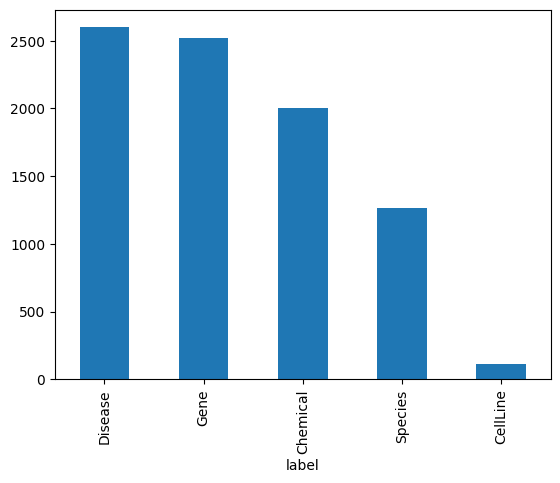

In [15]:
df_all["label"].value_counts().plot(kind='bar')

In [16]:
df_species_disease=df_all[(df_all["label"]=="Species") | (df_all["label"]=="Disease")]

In [22]:
df_species_disease.columns

Index(['index', 'sent_id', 'sentence', 'entity', 'start_chunck', 'end_chunk',
       'label', 'score', 'PMC_ID'],
      dtype='object')

In [20]:
df_species_disease=df_species_disease.reset_index()

In [21]:
df_species_disease.sent_id[0]

'PMC10000167_3'

In [25]:
sent_id=df_species_disease.sent_id[0]
df_2Entities=pd.DataFrame(columns=["PMC_ID","sent_id","sentence","entity1","entity2","label1","label2"])
for i in range(1,len(df_species_disease)):
    if df_species_disease.sent_id[i-1]==df_species_disease.sent_id[i] and df_species_disease.entity[i-1]!=df_species_disease.sent_id[i]:
        res=[df_species_disease.PMC_ID[i],df_species_disease.sent_id[i],df_species_disease.sentence[i],
            df_species_disease.entity[i-1],df_species_disease.entity[i],df_species_disease.label[i-1],
            df_species_disease.label[i]]
        df_2Entities.loc[len(df_2Entities)]=res

In [ ]:
def 

In [26]:
df_2Entities

,PMC_ID,sent_id,sentence,entity1,entity2,label1,label2
0,PMC10000167,PMC10000167_3,These differences in NSC content are of intere...,equine,horses,Species,Species
1,PMC10000167,PMC10000167_3,These differences in NSC content are of intere...,horses,metabolic dysfunction,Species,Disease
2,PMC10000167,PMC10000167_8,Diet has been identified as a dominant factor ...,humans,horses,Species,Species
3,PMC10000167,PMC10000167_11,"Overall , few studies have evaluated the hindg...",horses,horses,Species,Species
4,PMC10000167,PMC10000167_14,[ 28 ] explored relationships between abundanc...,hay,hay,Species,Species
...,...,...,...,...,...,...,...
1865,PMC10003930,PMC10003930_208,reported enriched levels of bacteria from the ...,CKD,ESKD,Disease,Disease
1866,PMC10003930,PMC10003930_211,Patients with diabetic nephropathy exhibited i...,diabetic nephropathy,Lactobacillus,Disease,Species
1867,PMC10003930,PMC10003930_213,"Nevertheless , additional studies are warrante...",CKD,diabetes mellitus,Disease,Disease
1868,PMC10003930,PMC10003930_223,"Moreover , studies reported a shift in gut mic...",CKD,ESKD,Disease,Disease


In [27]:
df_species_disease.entity.value_counts()

entity
inflammation                  146
mice                          145
HAEC                          130
horses                        107
fibrosis                      101
                             ... 
genetic defects                 1
Hyperhomocysteinemia            1
oral inflammatory diseases      1
Diabetes mellitus               1
HD                              1
Name: count, Length: 748, dtype: int64

In [18]:
#print(set(df_species_disease.entity.tolist()))

In [30]:
df_2Entities.to_csv(os.path.join(cf.PATH_RESULTS,"extracted_2_Entities_04_09.csv"))

In [ ]:
set(df_species_disease.entity.tolist())

In [6]:
df_list=[]
ner_dfs=os.path.join(cf.PATH_BIONER_EXTRACTED,"Actinomyces")
for df_file in os.listdir(ner_dfs):
    if df_file.endswith(".csv"):
        df=pd.read_csv(os.path.join(ner_dfs,df_file))
        df=df.drop(columns="Unnamed: 0")
        df["PMC_ID"]=[df_file.split(".")[0]]*len(df)
        df_list.append(df)

In [7]:
len(df_list)

1748

In [8]:
df_all2=pd.concat(df_list)

<Axes: xlabel='label'>

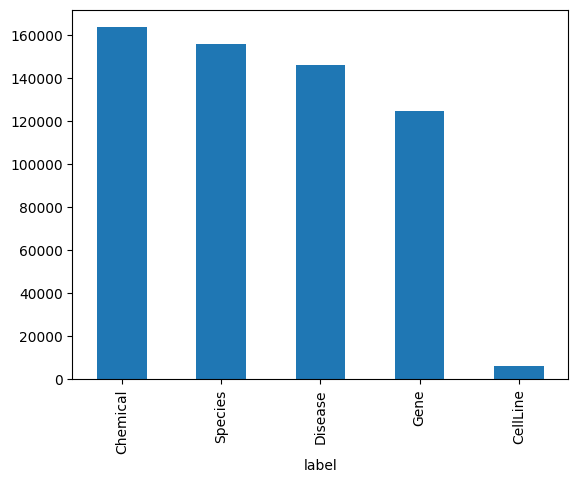

In [9]:
df_all2["label"].value_counts().plot(kind='bar')

In [5]:
#df_all2.to_csv(os.path.join(cf.PATH_RESULTS,"extracted_2_Entities_04_09.csv"))
df_all2=pd.read_csv(os.path.join(cf.PATH_RESULTS,"extracted_2_Entities_04_09.csv"))

In [11]:
df_all2.head()

,Unnamed: 0,sent_id,sentence,entity,start_chunck,end_chunk,label,score,PMC_ID
0,0,PMC10000417_0,The term “ peri-implant diseases ” refers to t...,peri-implant diseases,10,31,Disease,0.724,PMC10000417
1,1,PMC10000417_0,The term “ peri-implant diseases ” refers to t...,mucositis,180,189,Disease,0.537,PMC10000417
2,2,PMC10000417_0,The term “ peri-implant diseases ” refers to t...,peri-implantitis,194,210,Disease,0.969,PMC10000417
3,3,PMC10000417_1,"In 2008 , mucositis was defined as inflammatio...",mucositis,9,18,Disease,0.993,PMC10000417
4,4,PMC10000417_1,"In 2008 , mucositis was defined as inflammatio...",inflammation,34,46,Disease,0.841,PMC10000417


In [14]:
df_species_disease_chemical2=df_all2[(df_all2["label"]=="Species") | (df_all2["label"]=="Disease") | (df_all2["label"]=="Chemical")]

In [15]:
df_species_disease_chemical2.shape

(424753, 9)

In [16]:
df_all2.shape

(146953, 8)

In [6]:
#df_species_disease_chemical2.to_csv(os.path.join(cf.PATH_RESULTS,"Species_Disease_Chemical_extracted_2_Entities_02_11.csv"))
df_species_disease_chemical2=pd.read_csv(os.path.join(cf.PATH_RESULTS,"Species_Disease_Chemical_extracted_2_Entities_02_11.csv"))

In [7]:
df_species_disease_chemical2.label.value_counts()

label
Chemical    148248
Species     142045
Disease     134460
Name: count, dtype: int64

In [9]:
from tqdm import tqdm
from itertools import combinations

In [10]:
df_spc=df_species_disease_chemical2[df_species_disease_chemical2["sent_id"]=="PMC10000417_136"]

In [12]:
pairs=list(combinations(df_spc["label"],2))

In [14]:
pairspairs_df = pd.DataFrame(pairs, columns=['label_1', 'label_2'])

In [ ]:
pairspairs_df

In [24]:
df_spc

,Unnamed: 0.1,Unnamed: 0,sent_id,sentence,entity,start_chunck,end_chunk,label,score,PMC_ID
128,152,152,PMC10000417_136,"In a bactericidal modality , CO2 , diode , erb...",CO2,28,31,Chemical,0.949,PMC10000417
129,153,153,PMC10000417_136,"In a bactericidal modality , CO2 , diode , erb...",yttrium aluminum garnet,53,76,Chemical,0.755,PMC10000417
130,154,154,PMC10000417_136,"In a bactericidal modality , CO2 , diode , erb...",Er,84,86,Chemical,0.698,PMC10000417
131,155,155,PMC10000417_136,"In a bactericidal modality , CO2 , diode , erb...",erbium,98,104,Chemical,0.731,PMC10000417
132,156,156,PMC10000417_136,"In a bactericidal modality , CO2 , diode , erb...",yttrium scandium gallium garnet,120,151,Chemical,0.813,PMC10000417
133,157,157,PMC10000417_136,"In a bactericidal modality , CO2 , diode , erb...",Er,153,155,Chemical,0.962,PMC10000417
134,158,158,PMC10000417_136,"In a bactericidal modality , CO2 , diode , erb...",Cr,157,159,Chemical,0.966,PMC10000417
135,159,159,PMC10000417_136,"In a bactericidal modality , CO2 , diode , erb...",YSGG,161,165,Chemical,0.732,PMC10000417
136,160,160,PMC10000417_136,"In a bactericidal modality , CO2 , diode , erb...",peri-implant diseases,203,224,Disease,0.864,PMC10000417


In [10]:
def construct_pair_entities(df):
    sent_id=df.sent_id[0]
    df_2Entities=pd.DataFrame(columns=["PMC_ID","sent_id","sentence","entity1","entity2","label1","label2"])
    for i in tqdm(range(1,len(df))):
        try:
            if df.sent_id[i-1]==df.sent_id[i] and df.entity[i-1]!=df.sent_id[i]:
                res=[df.PMC_ID[i],df.sent_id[i],df.sentence[i],
                    df.entity[i-1],df.entity[i],df.label[i-1],
                    df.label[i]]
                df_2Entities.loc[len(df_2Entities)]=res
        except:
            continue
            #print(f"index {i} have a problem")
    return df_2Entities

In [11]:
df_2Entities=construct_pair_entities(df=df_species_disease_chemical2)

  0%|          | 0/424752 [00:00<?, ?it/s]

100%|██████████| 424752/424752 [46:48<00:00, 151.24it/s]


In [14]:
df_2Entities.head(100)

,PMC_ID,sent_id,sentence,entity1,entity2,label1,label2
0,PMC10000417,PMC10000417_0,The term “ peri-implant diseases ” refers to t...,peri-implant diseases,mucositis,Disease,Disease
1,PMC10000417,PMC10000417_0,The term “ peri-implant diseases ” refers to t...,mucositis,peri-implantitis,Disease,Disease
2,PMC10000417,PMC10000417_1,"In 2008 , mucositis was defined as inflammatio...",mucositis,inflammation,Disease,Disease
3,PMC10000417,PMC10000417_1,"In 2008 , mucositis was defined as inflammatio...",inflammation,peri-implantitis,Disease,Disease
4,PMC10000417,PMC10000417_1,"In 2008 , mucositis was defined as inflammatio...",peri-implantitis,inflammation,Disease,Disease
...,...,...,...,...,...,...,...
95,PMC10000417,PMC10000417_171,"Doxycycline , another tetracycline , is applie...",Doxycycline,tetracycline,Chemical,Chemical
96,PMC10000417,PMC10000417_174,Treatment with chlorhexidine gel or mechanical...,chlorhexidine,doxycycline,Chemical,Chemical
97,PMC10000417,PMC10000417_175,"Products based on minocycline , a broad-spectr...",minocycline,tetracycline,Chemical,Chemical
98,PMC10000417,PMC10000417_176,The topical application of minocycline microsp...,minocycline,chlorhexidine,Chemical,Chemical


In [15]:
df_2Entities_pair=df_2Entities[df_2Entities["label1"]!=df_2Entities["label2"]]

In [16]:
df_2Entities_pair

,PMC_ID,sent_id,sentence,entity1,entity2,label1,label2
30,PMC10000417,PMC10000417_60,Film proteins contain various amino acid seque...,amino acid,bacteria,Chemical,Species
32,PMC10000417,PMC10000417_64,Oxygen is gradually consumed by facultative ae...,Oxygen,Fusobacterium nucleatum,Chemical,Species
47,PMC10000417,PMC10000417_81,are frequently isolated from peri-implant lesi...,lesions,Campylobacter rectus,Disease,Species
70,PMC10000417,PMC10000417_136,"In a bactericidal modality , CO2 , diode , erb...",YSGG,peri-implant diseases,Chemical,Disease
76,PMC10000417,PMC10000417_142,Slow-release antibacterial agents include chlo...,chlorhexidine,periodontitis,Chemical,Disease
...,...,...,...,...,...,...,...
230471,PMC5869295,PMC5869295_125,"For example , Clostridium tetani , a causative...",Clostridium tetani,tetanus,Species,Disease
230479,PMC5869295,PMC5869295_156,Both tooth dentine and cementum show evidence ...,Y. pestis infection,Y. pestis,Disease,Species
230492,PMC5869295,PMC5869295_217,"For example , Clostridium tetani , a causative...",Clostridium tetani,tetanus,Species,Disease
230496,PMC5869295,PMC5869295_225,"For example , Clostridium tetani , a causative...",Clostridium tetani,tetanus,Species,Disease


In [32]:
df_species_disease_chemical2.iloc[46]

Unnamed: 0                                                     46
sent_id                                            PMC10000417_36
sentence        Subsequently , on its implant surface , the ba...
entity                                                   bacteria
start_chunck                                                   42
end_chunk                                                      50
label                                                     Species
score                                                       0.544
PMC_ID                                                PMC10000417
Name: 46, dtype: object

In [2]:
import json 
import pandas as pd
import os

In [3]:
a="/fhjhfhdfh/split_{}/train".format(0)

In [4]:
a

'/fhjhfhdfh/split_0/train'

In [6]:
Species_Disease_extracted_2_Entities_04_09=pd.read_csv(os.path.join(cf.PATH_RESULTS,"Species_Disease_extracted_2_Entities_04_09.csv"))

In [7]:
Species_Disease_extracted_2_Entities_04_09.shape

(276505, 9)

In [8]:
Species_Disease_extracted_2_Entities_04_09.sent_id.value_counts()

sent_id
PMC5552814_97      221
PMC5552814_218     221
PMC5552814_148     122
PMC5552814_269     122
PMC4804642_43       71
                  ... 
PMC5103241_7864      1
PMC5103241_7861      1
PMC5103241_7860      1
PMC5103241_7859      1
PMC5869506_261       1
Name: count, Length: 144493, dtype: int64

In [9]:
Species_Disease_extracted_2_Entities_04_09.head(5)

,Unnamed: 0,sent_id,sentence,entity,start_chunck,end_chunk,label,score,PMC_ID
0,0,PMC10000417_0,The term “ peri-implant diseases ” refers to t...,peri-implant diseases,10,31,Disease,0.724,PMC10000417
1,1,PMC10000417_0,The term “ peri-implant diseases ” refers to t...,mucositis,180,189,Disease,0.537,PMC10000417
2,2,PMC10000417_0,The term “ peri-implant diseases ” refers to t...,peri-implantitis,194,210,Disease,0.969,PMC10000417
3,3,PMC10000417_1,"In 2008 , mucositis was defined as inflammatio...",mucositis,9,18,Disease,0.993,PMC10000417
4,4,PMC10000417_1,"In 2008 , mucositis was defined as inflammatio...",inflammation,34,46,Disease,0.841,PMC10000417


In [12]:
dict_sent=Species_Disease_extracted_2_Entities_04_09.sent_id.value_counts().to_dict()

In [13]:
df=Species_Disease_extracted_2_Entities_04_09

In [14]:
df.head()

,Unnamed: 0,sent_id,sentence,entity,start_chunck,end_chunk,label,score,PMC_ID
0,0,PMC10000417_0,The term “ peri-implant diseases ” refers to t...,peri-implant diseases,10,31,Disease,0.724,PMC10000417
1,1,PMC10000417_0,The term “ peri-implant diseases ” refers to t...,mucositis,180,189,Disease,0.537,PMC10000417
2,2,PMC10000417_0,The term “ peri-implant diseases ” refers to t...,peri-implantitis,194,210,Disease,0.969,PMC10000417
3,3,PMC10000417_1,"In 2008 , mucositis was defined as inflammatio...",mucositis,9,18,Disease,0.993,PMC10000417
4,4,PMC10000417_1,"In 2008 , mucositis was defined as inflammatio...",inflammation,34,46,Disease,0.841,PMC10000417


In [15]:
#dict_sent
selected_sentences=[]
entities=[]
labels=[]
start_chunck=[]
end_chunck=[]
sentences=[]
for key,value in dict_sent.items():
    if value <=10 and value>=5:
        selected_sentences.append(key)
        filtered_rows = df[df.sent_id==key]
        filtered_rows.reset_index()
        entities.append(filtered_rows["entity"].tolist())
        labels.append(filtered_rows["label"].tolist())
        start_chunck.append(filtered_rows["start_chunck"].tolist())
        end_chunck.append(filtered_rows["end_chunk"].tolist())
        sentences.append(filtered_rows["sentence"].tolist()[0])

In [26]:
len(selected_sentences),len(entities),len(start_chunck),len(end_chunck),len(sentences)

(6966, 6966, 6966, 6966, 6966)

In [59]:
annotDict={"Sentences":[]}
jsonObj=[]
for i in range(len(selected_sentences)):
    #annotDict["Sentences"]
    dictInput={"text":sentences[i],
               "Sent_ID":selected_sentences[i],
               "Entities":{"text":entities[i],
                            "labels":labels[i],
                            "start_chuncks":start_chunck[i],
                            "end_chuncks":end_chunck[i]}
                   }
    jsonObj.append(dictInput)

In [45]:
#annotDict

In [9]:
with open(os.path.join(cf.PATH_RESULTS,"Sentences for species and diseases NER and RE annotation.json"),"w",encoding="utf-8") as f:
    json.dump(jsonObj,f,ensure_ascii=False)

NameError: name 'jsonObj' is not defined

In [1]:
jsonObj[1]

NameError: name 'jsonObj' is not defined

In [8]:
def clean_non_utf8(text):
    return ''.join(char for char in text if ord(char) < 128)

# Load JSON data from a file
with open(os.path.join(cf.PATH_RESULTS,"Sentences for species and diseases NER and RE annotation.json"), 'r', encoding='utf-8') as file:
    json_data = json.load(file)

# Clean non-UTF-8 characters in string values
def clean_dict(data):
    if isinstance(data, dict):
        return {clean_non_utf8(key): clean_dict(value) for key, value in data.items()}
    elif isinstance(data, list):
        return [clean_dict(item) for item in data]
    elif isinstance(data, str):
        return clean_non_utf8(data)
    else:
        return data

cleaned_data = clean_dict(json_data)

In [ ]:
# Save cleaned JSON data to a new file
with open(os.path.join(cf.PATH_RESULTS,'cleaned.json'), 'w', encoding='utf-8') as outfile:
    json.dump(cleaned_data, outfile, ensure_ascii=False, indent=4)

In [25]:
with open(os.path.join(cf.PATH_RESULTS,'cleaned.json'), "r") as file:
    #for line in file:
        # Parse the JSON object from the line
    jsonData = json.load(file)

In [27]:
len(jsonData)

6966

In [30]:
jsonData[1]

{'text': 'Bacteria growing in the presence of E. arvense and H. glabra extracts did not show any alteration of the analyzed properties.Table 6Effect of plant extracts on P fimbriae ( P ) and curli fibers ( C ) synthesis by E. coli PlantsExtract concentrations ( mg / mL ) Control0.1250.250.51.05.010.015.020.0PCPCPCPCPCPCPCPC B. pendula ++++++++++++++ E. arvense ++++++++++++++ G. odoratum +++++++++++++ H. glabra +++++++ NtNtNtNtNtNtNtNtNtNt U. dioica ++++++++++++++ V. vitis-idaea ++++ NtNtNtNtNtNt + , present ;  , absent Nt not tested ( bacterial survival lower than 5 %) Effect of plant extracts on P fimbriae ( P ) and curli fibers ( C ) synthesis by E. coli + , present ;  , absent Nt not tested ( bacterial survival lower than 5 %)',
 'Sent_ID': 'PMC3495101_164',
 'Entities': {'text': ['E. arvense',
   'H. glabra',
   'E. coli',
   'E. arvense',
   'G. odoratum',
   'H. glabra',
   'U. dioica',
   'V. vitis-idaea',
   'E. coli',
   'bacterial'],
  'labels': ['Species',
   'Species',
   '

In [31]:
## Saving a json  data as jsonl file for Prodigy
with open(os.path.join(cf.PATH_RESULTS,'species_annotation.jsonl'), "w") as file:
    for data in jsonData:
        json.dump(data, file)
        file.write("\n")

In [17]:
loaded_data = []

# Load data from the JSONL file
with open("/home/aberhe/Projects/SANTAL/ASLR/data/test_med.jsonl", "r") as file:
    for line in file:
        # Parse the JSON object from the line
        record = json.loads(line)
        loaded_data.append(record)

In [22]:
loaded_data[0]

{'text': '\nPosologie\nAdultes y compris les personnes âgées : un comprimé de 1 mg à prendre par voie orale une fois par jour.\nEnfants : Anastrozole comprimés n’est pas recommandé chez les enfants en raison de l’insuffisance des données en matière de tolérance et d’efficacité (voir rubriques 4.4 et 5.1).\nInsuffisance rénale : aucune modification posologique n’est recommandée chez les patientes présentant une insuffisance rénale légère ou modérée.\nInsuffisance hépatique : aucune modification posologique n’est recommandée chez les patientes présentant une insuffisance hépatique légère.\nLorsque la maladie est à un stade précoce, la durée recommandée du traitement doit être de 5 ans.\n4.3. ',
 'meta': {'Id': 'BDD_medicament_0'}}